In [20]:
#imports 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# Datset
df=pd.read_csv("/Users/krushna/Downloads/height-weight.csv")
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


Text(0.5, 1.0, 'Weight VS Height Plot')

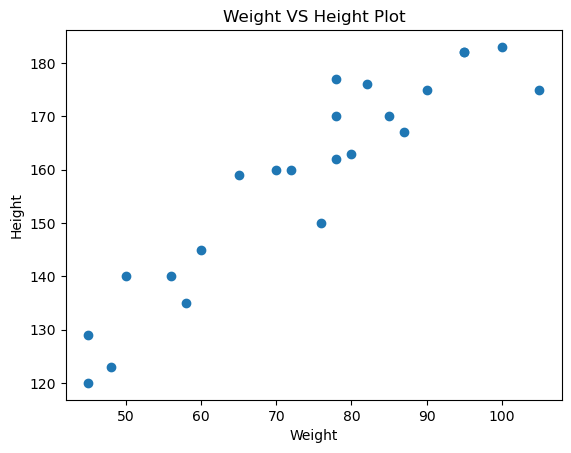

In [22]:
# Scatter Plot to get relationship between Dependent and Independed Variable 
plt.scatter(df['Weight'] , df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Weight VS Height Plot")

In [23]:
# Correlation Matrix- To recognise relation +ive and -ive relationship 
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [24]:
# Divide the data in dependent and Independent columns
df_features = df[['Weight']]
df_target = df['Height']

In [25]:
# Train Test Split 
import sklearn 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.25, random_state=42)

In [26]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [28]:
# Apply Machine Learning Algo 
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs =-1)

In [29]:
regression.fit(df_features,df_target )

LinearRegression(n_jobs=-1)

In [30]:
# Predict
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [1.01654416]
Intercept: 83.34382656470417


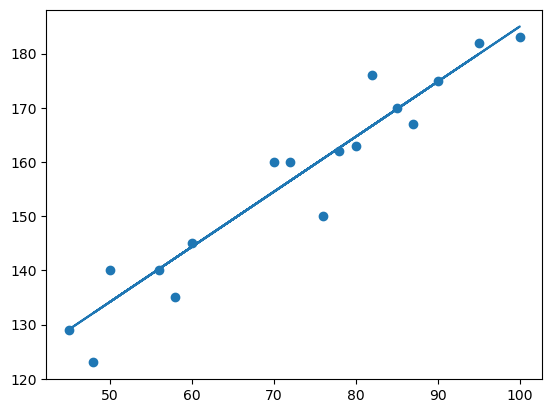

In [31]:
# Best Fit Line
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train))

### Prediction of test data


In [34]:
# Predicted height output= intercept +coef_(Weights)
y_pred_test = 83.3 + 1.016*(x_test)
y_pred_test

,Weight
15,162.548
9,162.548
0,129.020
8,179.820
17,149.340
12,189.980


In [36]:
## Prediction for test data
y_pred=regression.predict(x_test)
y_pred

array([162.63427129, 162.63427129, 129.08831391, 179.91552206,
       149.41919717, 190.08096369])

In [37]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

111.1329779301663
9.594335964890575
10.541962717168293


In [38]:
# Performace Metrices
#R^2

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)


0.7446034340577091


In [41]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,x_train).fit()
prediction=model.predict(x_test)
print(prediction)
print(model.summary())

15    164.134205
9     164.134205
0      94.692811
8     199.907045
17    136.778504
12    220.949891
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1133.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                    2.80e-16
Time:                        16:32:27   Log-Likelihood:                         -73.806
No. Observations:                  17   AIC:                                      149.6
Df Residuals:                      16   BIC:                                      150.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
   

/Applications/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [42]:
## Prediction For new data
regression.predict(scaler.transform([[72]]))

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([83.31484669])